In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [2]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/PLA_LED_2000epoch/2019-06-21-170608/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/PLA_LED_2000epoch/2019-06-21-170608/log\\2019-06-21.csv',
 '../SHARCNET/Results/PLA_LED_2000epoch/2019-06-21-170608/log\\2019-06-22.csv']

In [3]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(30940, 4)
(78378, 4)


In [4]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [6]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_pla.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(109318, 11)

In [7]:
Agent_1_action_df

actuator_name,led_ru,led_ho,led_rd,moth_ru,moth_ho,moth_rd,I_max,ml_gap,sma_gap,n_gap,t_sma
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
2,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
3,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
4,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
5,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
6,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
7,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
8,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353
9,-0.979775,-0.564365,-0.294384,0.651598,-0.421334,0.232427,0.825265,0.822094,-0.949927,0.360493,0.803353


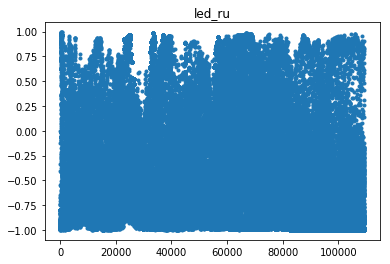

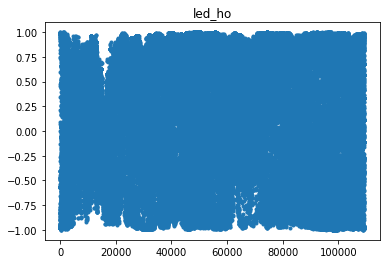

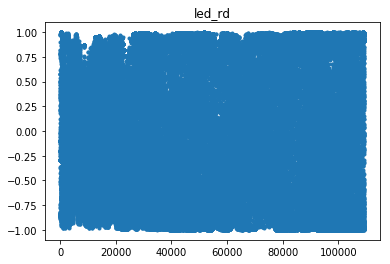

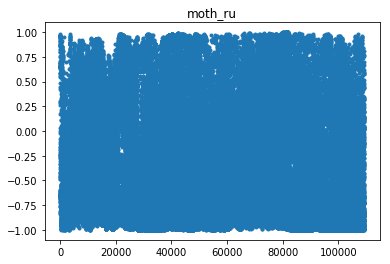

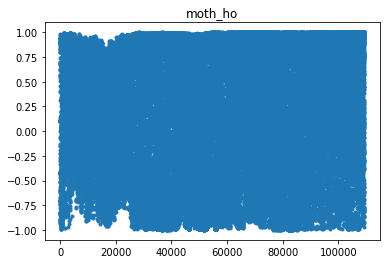

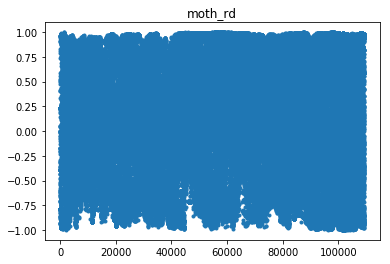

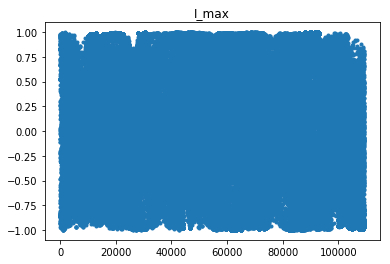

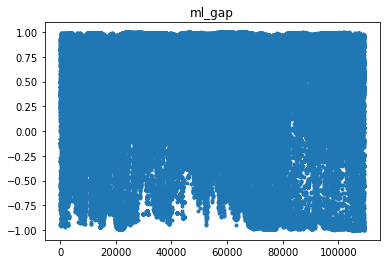

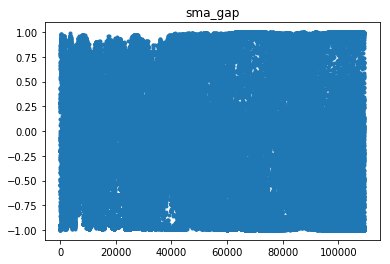

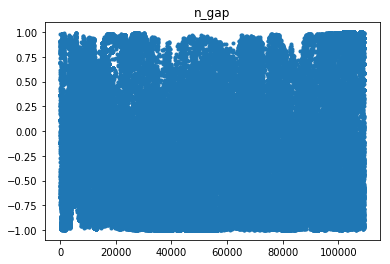

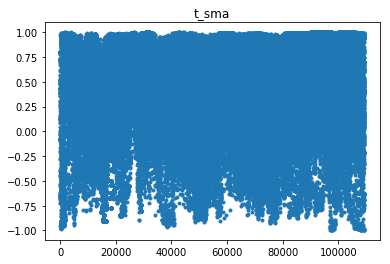

In [10]:
for col in Agent_1_action_df.columns:
    plt.figure()
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col],'.')
    plt.title(col)
    

In [11]:
Agent_1_action_df.index

RangeIndex(start=0, stop=109318, step=1)